In [1]:
def bold_text(text):
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    return bold_start + text + bold_end


print(bold_text("Rankine Cycle Diagram"))

Rankine Cycle Diagram


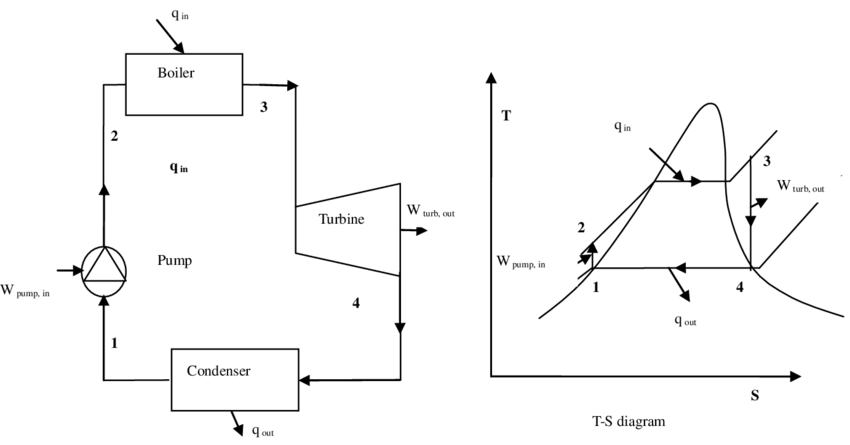

In [2]:
%matplotlib ipympl

# Allows an interactive 3D graph

import matplotlib.pyplot as plt 
from pyXSteam.XSteam import XSteam
import ipywidgets as widgets
from IPython import display
from tabulate import tabulate
from ipywidgets import Box

# The program is designed to graph a rankine cycle within a designated temperature and pressure range.

steamTable = XSteam(XSteam.UNIT_SYSTEM_BARE)

print("""This program is designed to graph a four stage Rankine cycle, 
composed of a pump, a boiler, a condenser, and a turbine.

The graph and table can be adjusted in real time using the sliders below.
""")


"""Although having one very large function may be confusing, the only way to graph an 
interactive graph was to have the function call be in a single location.
"""

def integration(temp_f, temp_i, pres_f, pres_i, resolution, button):
    # Empty lists are given to be appended in "slices"
    button = str(button)
    x_axis = list()
    x_axis2 = list()
    y_axis = list()
    z_axis = list()
    color_ratio = list()
    color_ratio2 = list()
    color_ratio3 = list()
    enthalpy_list = list()
    entropy_list = list()
    temp_results = list()
    temp_results2 = list()
    press_results = list()
    temp_list = list()
    temp_list2 = list()
    press_results2 = list()
    # All temperatures within the enthalpy curve fall between 400 and 1000
    enthalpy_min = 300
    enthalpy_max = 4000
    entropy_min = 2
    entropy_max = 7
    # The difference in between the max and minimum value are calculated
    contour_temp_freq = abs(temp_i - temp_f) / resolution
    contour_pres_freq = abs(pres_i-pres_f) / resolution
    contour_enthalpy_freq = abs(enthalpy_min - enthalpy_max) / resolution
    contour_entropy_freq = abs(entropy_min - entropy_max) / resolution
    press_min1 = min(pres_f, pres_i)
    # All variances of temperature and pressure are sliced
    for number_1 in range(0, resolution):
        temp1 = min(temp_f, temp_i) + number_1 * contour_temp_freq
        for number_2 in range(0, resolution):
            z_axis.append(temp1)
            y_axis.append(press_min1)
            x_axis.append(steamTable.h_pt(press_min1, int(temp1)))
            x_axis2.append(steamTable.s_pt(press_min1, int(temp1)))
            press_min1 = number_2 * contour_pres_freq + min(pres_i, pres_f)
    # The color gradient for the graph is calculated
    for value in z_axis:
        color_ratio.append(value/1500)
    # Slices in entropy and pressure are made
    for number_1 in range(0, resolution):
        enthalpy = int(min(enthalpy_min, enthalpy_max) + number_1 * contour_enthalpy_freq)
        entropy = min(entropy_min, entropy_max) + number_1 * contour_entropy_freq
        for number_2 in range(0, resolution):
            press_min2 = round(number_2 * contour_pres_freq + min(pres_i, pres_f), 3)
            temp_2 = steamTable.t_ph(press_min2, enthalpy)
            temp_2_entropy = steamTable.t_ps(press_min2, entropy)
            # The temperature value is only graphed if an identical value is present
            if temp_2 < min(temp_f, temp_i) or temp_2 > max(temp_f, temp_i):
                pass
            elif temp_2 not in temp_results:
                temp_results.append(temp_2)
            else:
                enthalpy_list.append(enthalpy)
                temp_list.append(temp_2)
                press_results.append(press_min2)
            if temp_2_entropy < min(temp_f, temp_i) or temp_2_entropy > max(temp_f, temp_i):
                pass
            elif temp_2_entropy not in temp_results2:
                temp_results2.append(temp_2_entropy)
            else:
                temp_list2.append(temp_2_entropy)
                press_results2.append(press_min2) 
                entropy_list.append(entropy)
    # The color ratio for the entropy/enthalpy curve of the graph is calculated
    for ratio in temp_list:
        color_ratio2.append(ratio/1500)
    for ratio1 in temp_list2:
        color_ratio3.append(ratio1/1500)
    # The two datasets are graphed
    plt.close()
    axis = plt.figure().add_subplot(projection='3d')
    axis.set_ylabel('Pressure (MPa)')
    axis.set_zlabel('Temperature (K)')
    if button == 'Enthalpy':
        axis.set_xlabel('Enthalpy (kJ/kg K)')
        plt.title('Change in Temperature/change in Enthalpy')
        axis.view_init(elev=20., azim=-135, roll=0)
        axis.scatter(x_axis, y_axis, z_axis, c=plt.cm.gnuplot2(color_ratio))
        axis.scatter(enthalpy_list, press_results, temp_list, c=plt.cm.gnuplot2(color_ratio2)) 
        plt.show()
    elif button == 'Entropy':
        axis.set_xlabel('Entropy (kJ/kg K)')
        plt.title('Change in Temperature/change in Entropy')
        axis.view_init(elev=20., azim=-135, roll=0)
        axis.scatter(x_axis2, y_axis, z_axis, c=plt.cm.CMRmap(color_ratio))
        axis.scatter(entropy_list, press_results2, temp_list2, c=plt.cm.CMRmap(color_ratio3))
        plt.show()
    else:
        pass
    

# Function outputs a dataset for each point on rankine cycle

def table_values(temp_i, temp_f, pres_f, pres_i):
    try:     
        enthalpy1 = steamTable.h_pt(pres_i, temp_i)
        entropy1 = steamTable.s_pt(pres_i, temp_i)
        # Entropy across points one and two are the same
        temp_2 = steamTable.t_ps(pres_f, entropy1)
        enthalpy2 = steamTable.h_pt(pres_f, temp_i)
        temp_3 = temp_f
        entropy3 = steamTable.s_pt(pres_f, temp_3)
        enthalpy3 = steamTable.h_pt(pres_f, temp_3)
        # Entropy between point three and four are the same
        temp_4 = steamTable.t_ps(pres_i, entropy3)
        enthalpy4 = steamTable.h_pt(pres_i, temp_4)
        row_1 = [1, pres_i, temp_i, enthalpy1, entropy1]
        row_2 = [2, pres_f, temp_2, enthalpy2, entropy1]
        row_3 = [3, pres_f, temp_3, enthalpy3, entropy3]
        row_4 = [4, pres_i, temp_4, enthalpy4, entropy3]
        data = [row_1, row_2, row_3, row_4]
        print(" ")
        print(tabulate(data, headers=["Point on cycle", "Pressure (MPa)", "Temperature (K)",
                                      "Enthalpy(kJ/kg)", "Entropy (kJ/ kg K)"]))
        print("""
        One or more of the temperatures and/or pressures may result in NaN values appearing. 
        This indicates that several or a single value(s) is outside of range. This is an inevitable 
        part of the program.
        
        The program will assume that the higher value is the final temperature or pressure,
        regardless of the labels listed.
        """)
        work_pump = enthalpy2 - enthalpy1
        work_turbine = enthalpy3 - enthalpy4
        thermo_efficiency = (work_turbine - work_pump)/(enthalpy3 - enthalpy2)
        print("The work done by the pump is " + str(abs(round(work_pump, 2))) + " kJ/kg" )
        print("")
        print("The work output by the turbine is " + str(abs(round(work_turbine, 2))) + " kJ/kg" )
        print("")
        print("The thermodynamic efficiency of the system is " + str(round(thermo_efficiency, 2)) + " %" )
    except ValueError:
        print("The pressure and/or temperature range selected is invalid")
        
        
# The interactive widgets are created

temp_i = widgets.IntSlider( value=300, min=300, max=900, continuous_update=True, step=1, description='Initial temp')
temp_f = widgets.IntSlider( value=800, min=600, max=1499, continuous_update=True, step=1, description='Final temp')
pres_i = widgets.FloatSlider( value=0.1, min=0.1, max=10, continuous_update=True, step=0.1, description='Initial pressure')
pres_f = widgets.FloatSlider( value=0.5, min=0.5, max=35, continuous_update=True, step=0.1, description='Final pressure')
resolution = widgets.IntSlider( value=20, min=10, max=50, continuous_update=True, step=1, description='Resolution')
button = widgets.ToggleButtons(
    options=['Enthalpy', 'Entropy'], description='Graph plotted', disabled=False,
    button_style='', 
    tooltips=['Enthalpy', 'Entropy'],

)

# The integration function is made dynamic

items = [widgets.interactive(integration, temp_f=temp_f, temp_i=temp_i, pres_f=pres_f, pres_i=pres_i, resolution=resolution, button=button), 
        widgets.interactive(table_values, temp_f=temp_f, temp_i=temp_i, pres_f=pres_f, pres_i=pres_i)]

widgets.GridBox(items, layout=widgets.Layout(grid_template_columns="repeat(1, 1000px)"))


This program is designed to graph a four stage Rankine cycle, 
composed of a pump, a boiler, a condenser, and a turbine.

The graph and table can be adjusted in real time using the sliders below.



GridBox(children=(interactive(children=(IntSlider(value=800, description='Final temp', max=1499, min=600), Int…